# Linear Regression


In this lesson we will learn about linear regression. We will first understand the basic math behind it and then implement it in Python. We will also look at ways of interpreting the linear model.



# Overview


$\hat{y} = XW$

*where*:
* $\hat{y}$ = prediction | $\in \mathbb{R}^{NX1}$ ($N$ is the number of samples)
* $X$ = inputs | $\in \mathbb{R}^{NXD}$ ($D$ is the number of features)
* $W$ = weights | $\in \mathbb{R}^{DX1}$ 

* **Objective:**  Use inputs $X$ to predict the output $\hat{y}$ using a linear model. The model will be a line of best fit that minimizes the distance between the predicted and target outcomes. Training data $(X, y)$ is used to train the model and learn the weights $W$ using **stochastic gradient descent (SGD)**.
* **Advantages:**
  * Computationally simple.
  * Highly interpretable.
  * Can account for continuous and categorical features.
* **Disadvantages:**
  * The model will perform well only when the data is linearly separable (for classification).
  * Usually not used for classification and only for regression.
* **Miscellaneous:** You can also use linear regression for binary classification tasks where if the predicted continuous value is above a threshold, it belongs to a certain class. But we will cover better techniques for classification in future lessons and will focus on linear regression for continuos regression tasks only.


# Training

*Steps*: 
1. Randomly initialize the model's weights $W$.
2. Feed inputs $X$ into the model to receive the predictions $\hat{y}$.
3. Compare the predictions $\hat{y}$ with the actual target values $y$ with the **objective (cost)** function to determine loss $J$. A common objective function for linear regression is mean squarred error (MSE). This function calculates the difference between the predicted and target values and squares it. (the $\frac{1}{2}$ is just for convenicing the derivative operation).
  * $MSE = J(\theta) = \frac{1}{2}\sum_{i}(\hat{y}_i - y_i)^2$
4. Calculate the gradient of loss $J(\theta)$ w.r.t to the model weights.
  * $J(\theta) = \frac{1}{2}\sum_{i}(\hat{y}_i - y_i)^2 = \frac{1}{2}\sum_{i}(X_iW - y_i)^2 $
  * $\frac{\partial{J}}{\partial{W}} = X(\hat{y} - y)$
4. Apply backpropagation to update the weights $W$ using a **learning rate** $\alpha$ and an **optimization technique** (ie. stochastic gradient descent). The simplified intuition is that the gradient tells you the direction for how to increase something so subtracting it will help you go the other way since we want to decrease loss $J(\theta)$.
  * $W = W- \alpha\frac{\partial{J}}{\partial{W}}$
5. Repeat steps 2 - 4 until model performs well.

# Data

We're going to create some simple dummy data to apply linear regression on.

In [1]:
from argparse import Namespace
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## ✅ Namespace定义参数

In [2]:
# Arguments
args = Namespace(
    seed=1234,
    data_file="sample_data.csv",
    num_samples=100,
    train_size=0.75,
    test_size=0.25,
    num_epochs=100,
)

# Set seed for reproducability
np.random.seed(args.seed)

In [3]:
# Generate synthetic data
def generate_data(num_samples):
    X = np.array(range(num_samples))
    random_noise = np.random.uniform(-10,10,size=num_samples)
    y = 3.65*X + 10 + random_noise # add some noise
    return X, y

In [4]:
# Generate random (linear) data
X, y = generate_data(args.num_samples)
data = np.vstack([X, y]).T
df = pd.DataFrame(data, columns=['X', 'y'])
df.head()

,X,y
0,0.0,3.830389
1,1.0,16.092175
2,2.0,16.054555
3,3.0,26.657172
4,4.0,30.199516


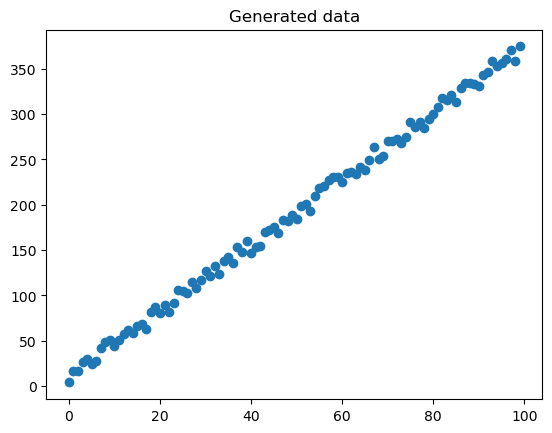

In [5]:
# Scatter plot
plt.title("Generated data")
plt.scatter(x=df["X"], y=df["y"])
plt.show()

# Scikit-learn implementation

**Note**: The `LinearRegression` class in Scikit-learn uses the normal equation to solve the fit. However, we are going to use Scikit-learn's `SGDRegressor` class which uses stochastic gradient descent. We want to use this optimization approach because we will be using this for the models in subsequent lessons.

In [7]:
# Import packages
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [8]:
# Create data splits, some for training and some for testing
# 如果特征 X 是一维的，建议使用 df["X"].values.reshape(-1, 1) 将其转换为二维数组
X_train, X_test, y_train, y_test = train_test_split(
    df["X"].values.reshape(-1, 1), df["y"], test_size=args.test_size, 
    random_state=args.seed)
print ("X_train:", X_train.shape)
print ("y_train:", y_train.shape)
print ("X_test:", X_test.shape)
print ("y_test:", y_test.shape)

X_train: (75, 1)
y_train: (75,)
X_test: (25, 1)
y_test: (25,)


We need to standardize our data (zero mean and unit variance) in order to properly use SGD and optimize quickly.

- `StandardScaler` `.transform` require two-dimensional matrix, even if dim is (n,1);
- output `y` usually requires (n,)

In [11]:
# Standardize the data (mean=0, std=1) using training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train.values.reshape(-1,1))

# Apply scaler on training and test data
standardized_X_train = X_scaler.transform(X_train)
standardized_y_train = y_scaler.transform(y_train.values.reshape(-1,1)).ravel()
standardized_X_test = X_scaler.transform(X_test)
standardized_y_test = y_scaler.transform(y_test.values.reshape(-1,1)).ravel()


# Check
print ("mean:", np.mean(standardized_X_train, axis=0), 
       np.mean(standardized_y_train, axis=0)) # mean should be ~0
print ("std:", np.std(standardized_X_train, axis=0), 
       np.std(standardized_y_train, axis=0))   # std should be 1

<class 'sklearn.preprocessing._data.StandardScaler'>
<class 'sklearn.preprocessing._data.StandardScaler'>
mean: [8.22952817e-17] 3.4356776682879325e-16
std: [1.] 1.0


In [20]:
# Initialize the model
lm = SGDRegressor(loss="squared_error",  max_iter=args.num_epochs)

In [21]:
# Train
lm.fit(X=standardized_X_train, y=standardized_y_train)

SGDRegressor(max_iter=100)

In [22]:
# Predictions (unstandardize them)
pred_train = (lm.predict(standardized_X_train) * np.sqrt(y_scaler.var_)) + y_scaler.mean_
pred_test = (lm.predict(standardized_X_test) * np.sqrt(y_scaler.var_)) + y_scaler.mean_

# Evaluation

There are several evaluation techniques to see how well our model performed.

In [23]:
import matplotlib.pyplot as plt

In [24]:
# Train and test MSE
train_mse = np.mean((y_train - pred_train) ** 2)
test_mse = np.mean((y_test - pred_test) ** 2)
print ("train_MSE: {0:.2f}, test_MSE: {1:.2f}".format(train_mse, test_mse))

train_MSE: 51.69, test_MSE: 56.98


Besides MSE, when we only have one feature, we can visually inspect the model.

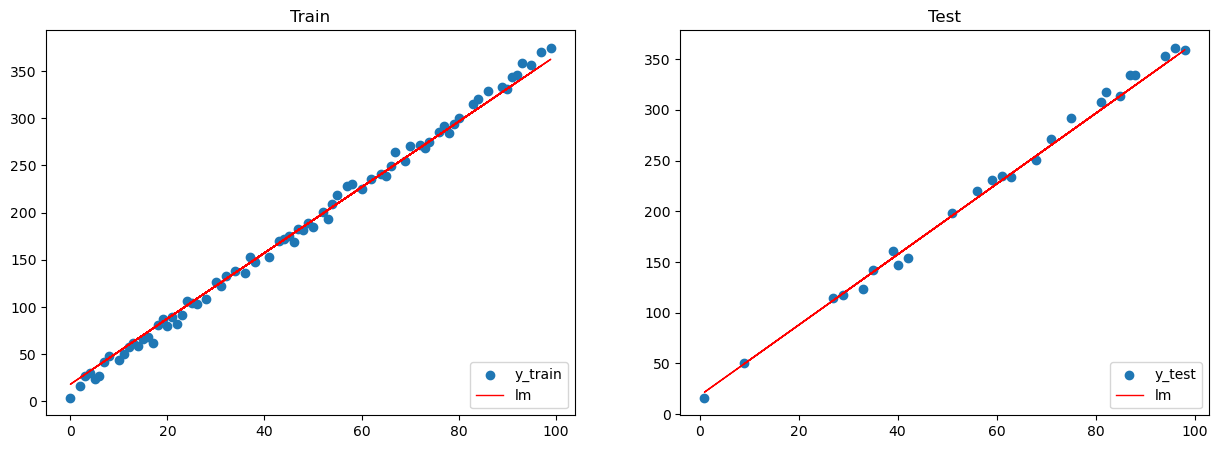

In [25]:
# Figure size
plt.figure(figsize=(15,5))

# Plot train data
plt.subplot(1, 2, 1)
plt.title("Train")
plt.scatter(X_train, y_train, label="y_train")
plt.plot(X_train, pred_train, color="red", linewidth=1, linestyle="-", label="lm")
plt.legend(loc='lower right')

# Plot test data
plt.subplot(1, 2, 2)
plt.title("Test")
plt.scatter(X_test, y_test, label="y_test")
plt.plot(X_test, pred_test, color="red", linewidth=1, linestyle="-", label="lm")
plt.legend(loc='lower right')

# Show plots
plt.show()

# Inference

In [27]:
# Feed in your own inputs
X_infer = np.array([0, 1, 2], dtype=np.float32)
standardized_X_infer = X_scaler.transform(X_infer.reshape(-1, 1))
pred_infer = (lm.predict(standardized_X_infer) * np.sqrt(y_scaler.var_)) + y_scaler.mean_
print(pred_infer)
df.head(3)

[18.1399623  21.61893022 25.09789813]


,X,y
0,0.0,3.830389
1,1.0,16.092175
2,2.0,16.054555


# Interpretability

Linear regression offers the great advantage of being highly interpretable. Each feature has a coefficient which signifies it's importance/impact on the output variable y. We can interpret our coefficient as follows: By increasing X by 1 unit, we increase y by $W$ (~3.65) units. 

**Note**: Since we standardized our inputs and outputs for gradient descent, we need to apply an operation to our coefficients and intercept to interpret them. See proof below.

In [28]:
# Unstandardize coefficients 
coef = lm.coef_ * (y_scaler.scale_/X_scaler.scale_)
intercept = lm.intercept_ * y_scaler.scale_ + y_scaler.mean_ - np.sum(coef*X_scaler.mean_)
print (coef) # ~3.65
print (intercept) # ~10

[3.47897081]
[18.13996433]


## Proof for unstandardizing coefficients:

在代码 `intercept = lm.intercept_ * y_scaler.scale_ + y_scaler.mean_ - np.sum(coef*X_scaler.mean_)` 里，`- np.sum(coef*X_scaler.mean_)` 这部分源于对线性回归模型在标准化数据上训练得到的截距进行反标准化的过程。下面为你详细解释其数学原理。

### 1. 线性回归模型与数据标准化
线性回归的基本模型为 $y = WX + b$，其中 $y$ 是因变量，$X$ 是自变量向量，$W$ 是系数向量，$b$ 是截距。

在实际应用中，为了提升模型训练的稳定性与效率，通常会对输入特征 $X$ 和输出变量 $y$ 进行标准化处理。标准化的公式如下：
- 对于输入特征 $X$，$\tilde{X}_j=\frac{X_j - \mu_{X_j}}{\sigma_{X_j}}$，这里 $j$ 表示第 $j$ 个特征，$\mu_{X_j}$ 和 $\sigma_{X_j}$ 分别是第 $j$ 个特征的均值和标准差。
- 对于输出变量 $y$，$\tilde{y}=\frac{y - \mu_y}{\sigma_y}$，其中 $\mu_y$ 和 $\sigma_y$ 分别是 $y$ 的均值和标准差。

在标准化数据上训练得到的线性回归模型为 $\tilde{y}=\tilde{W}\tilde{X}+\tilde{b}$，其中 $\tilde{W}$ 和 $\tilde{b}$ 是在标准化数据上估计得到的系数和截距。

### 2. 反标准化过程推导
把标准化公式代入 $\tilde{y}=\tilde{W}\tilde{X}+\tilde{b}$ 可得：
$$
\frac{y - \mu_y}{\sigma_y}=\tilde{W}\left(\frac{X - \mu_X}{\sigma_X}\right)+\tilde{b}
$$
等式两边同时乘以 $\sigma_y$：
$$
y - \mu_y=\tilde{W}\frac{\sigma_y}{\sigma_X}(X - \mu_X)+\tilde{b}\sigma_y
$$
进一步展开可得：
$$
y=\tilde{W}\frac{\sigma_y}{\sigma_X}X-\tilde{W}\frac{\sigma_y}{\sigma_X}\mu_X+\tilde{b}\sigma_y+\mu_y
$$

与原始线性回归模型 $y = WX + b$ 相对比，非标准化的系数 $W=\tilde{W}\frac{\sigma_y}{\sigma_X}$，非标准化的截距 $b = \tilde{b}\sigma_y+\mu_y-\sum_{j = 1}^{n}W_j\mu_{X_j}$，这里 $n$ 是特征的数量。

### 3. 代码对应关系
- `lm.intercept_` 对应 $\tilde{b}$
- `y_scaler.scale_` 对应 $\sigma_y$
- `y_scaler.mean_` 对应 $\mu_y$
- `coef` 对应 $W$，也就是已经反标准化后的系数
- `X_scaler.mean_` 对应 $\mu_X$

所以，`np.sum(coef*X_scaler.mean_)` 这部分计算的是 $\sum_{j = 1}^{n}W_j\mu_{X_j}$，从 `lm.intercept_ * y_scaler.scale_ + y_scaler.mean_` 里减去这部分，就能得到非标准化的截距。

综上所述，`- np.sum(coef*X_scaler.mean_)` 是在对标准化数据上训练得到的截距进行反标准化时，根据数学推导得出的必要步骤。


### Proof for unstandardizing coefficients:



Note that both X and y were standardized.

$\frac{\mathbb{E}[y] - \hat{y}}{\sigma_y} = W_0 + \sum_{j=1}^{k}W_jz_j$

$z_j = \frac{x_j - \bar{x}_j}{\sigma_j}$

$ \hat{y}_{scaled} = \frac{\hat{y}_{unscaled} - \bar{y}}{\sigma_y} = \hat{W_0} + \sum_{j=1}^{k} \hat{W}_j (\frac{x_j - \bar{x}_j}{\sigma_j}) $

$\hat{y}_{unscaled} = \hat{W}_0\sigma_y + \bar{y} - \sum_{j=1}^{k} \hat{W}_j(\frac{\sigma_y}{\sigma_j})\bar{x}_j + \sum_{j=1}^{k}(\frac{\sigma_y}{\sigma_j})x_j $


# Regularization

Regularization helps decrease over fitting. Below is L2 regularization (ridge regression). There are many forms of regularization but they all work to reduce overfitting in our models. With L2 regularization, we are penalizing the weights with large magnitudes by decaying them. Having certain weights with high magnitudes will lead to preferential bias with the inputs and we want the model to work with all the inputs and not just a select few. There are also other types of regularization like L1 (lasso regression) which is useful for creating sparse models where some feature cofficients are zeroed out, or elastic which combines L1 and L2 penalties. 

**Note**: Regularization is not just for linear regression. You can use it to regualr any model's weights including the ones we will look at in future lessons.

* $ J(\theta) = = \frac{1}{2}\sum_{i}(X_iW - y_i)^2 + \frac{\lambda}{2}\sum\sum W^2$
* $ \frac{\partial{J}}{\partial{W}}  = X (\hat{y} - y) + \lambda W $
* $W = W- \alpha\frac{\partial{J}}{\partial{W}}$
where:
  * $\lambda$ is the regularzation coefficient

In [0]:
# Initialize the model with L2 regularization
lm = SGDRegressor(loss="squared_loss", penalty='l2', alpha=1e-2, 
                  max_iter=args.num_epochs)

In [18]:
# Train
lm.fit(X=standardized_X_train, y=standardized_y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDRegressor(alpha=0.01, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=100,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [0]:
# Predictions (unstandardize them)
pred_train = (lm.predict(standardized_X_train) * np.sqrt(y_scaler.var_)) + y_scaler.mean_
pred_test = (lm.predict(standardized_X_test) * np.sqrt(y_scaler.var_)) + y_scaler.mean_

In [20]:
# Train and test MSE
train_mse = np.mean((y_train - pred_train) ** 2)
test_mse = np.mean((y_test - pred_test) ** 2)
print ("train_MSE: {0:.2f}, test_MSE: {1:.2f}".format(
    train_mse, test_mse))

train_MSE: 30.22, test_MSE: 35.73


Regularization didn't help much with this specific example because our data is generation from a perfect linear equation but for realistic data, regularization can help our model generalize well.

In [21]:
# Unstandardize coefficients 
coef = lm.coef_ * (y_scaler.scale_/X_scaler.scale_)
intercept = lm.intercept_ * y_scaler.scale_ + y_scaler.mean_ - (coef*X_scaler.mean_)
print (coef) # ~3.65
print (intercept) # ~10

[3.60760035]
[12.17506412]


# Categorical variables

In our example, the feature was a continuous variable but what if we also have features that are categorical? One option is to treat the categorical variables as one-hot encoded variables. This is very easy to do with Pandas and once you create the dummy variables, you can use the same steps as above to train your linear model.

In [22]:
# Create data with categorical features
cat_data = pd.DataFrame(['a', 'b', 'c', 'a'], columns=['favorite_letter'])
cat_data.head()

,favorite_letter
0,a
1,b
2,c
3,a


In [23]:
dummy_cat_data = pd.get_dummies(cat_data)
dummy_cat_data.head()

,favorite_letter_a,favorite_letter_b,favorite_letter_c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0


Now you can concat this with your continuous features and train the linear model.

# TODO

- polynomial regression
- simple example with normal equation method (sklearn.linear_model.LinearRegression) with pros and cons vs. SGD linear regression